In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats
import warnings

import warnings
warnings.filterwarnings('ignore')

# Configurar matplotlib
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)

In [16]:
np.random.seed(42)
n_samples = 1000

In [17]:
# Crear variables con correlaciones realistas
# Simulamos datos de empleados de una empresa
salario_base = np.random.normal(50000, 15000, n_samples)
años_experiencia = np.random.normal(5, 3, n_samples)
edad = 22 + años_experiencia + np.random.normal(0, 2, n_samples)

# Variables correlacionadas con salario y experiencia
salario = salario_base + años_experiencia * 3000 + np.random.normal(0, 5000, n_samples)
horas_semana = 40 + años_experiencia * 0.5 + np.random.normal(0, 5, n_samples)
proyectos_año = 8 + años_experiencia * 0.8 + np.random.normal(0, 2, n_samples)

# Variable menos correlacionada (satisfacción laboral)
satisfaccion = np.random.normal(7, 2, n_samples) + 0.1 * (salario / 1000) + np.random.normal(0, 1, n_samples)

# Crear DataFrame
data = pd.DataFrame({
    'salario': np.clip(salario, 25000, 120000),
    'años_experiencia': np.clip(años_experiencia, 0, 20),
    'edad': np.clip(edad, 22, 65),
    'horas_semana': np.clip(horas_semana, 20, 60),
    'proyectos_año': np.clip(proyectos_año, 2, 20),
    'satisfaccion': np.clip(satisfaccion, 1, 10)
})

print(f"✅ Datos generados: {data.shape[0]} empleados, {data.shape[1]} características")
print("\n📋 Primeras 5 filas:")
data.head()

✅ Datos generados: 1000 empleados, 6 características

📋 Primeras 5 filas:


,salario,años_experiencia,edad,horas_semana,proyectos_año,satisfaccion
0,75505.873435,9.198066,29.847710,40.281565,14.510934,10.0
1,66945.813575,7.773901,29.484864,43.730933,13.312293,10.0
2,73183.973734,5.178891,25.594051,42.679530,8.551827,10.0
3,91461.455133,3.059190,24.443267,43.892747,9.787171,10.0
4,70554.474824,7.094670,25.307441,36.713043,15.141394,10.0



📈 PASO 2: Análisis de correlaciones
------------------------------
🔗 Matriz de correlación:
                  salario  años_experiencia   edad  horas_semana  \
salario             1.000             0.454  0.392         0.107   
años_experiencia    0.454             1.000  0.828         0.273   
edad                0.392             0.828  1.000         0.241   
horas_semana        0.107             0.273  0.241         1.000   
proyectos_año       0.361             0.769  0.635         0.185   
satisfaccion        0.312             0.166  0.123         0.081   

                  proyectos_año  satisfaccion  
salario                   0.361         0.312  
años_experiencia          0.769         0.166  
edad                      0.635         0.123  
horas_semana              0.185         0.081  
proyectos_año             1.000         0.144  
satisfaccion              0.144         1.000  


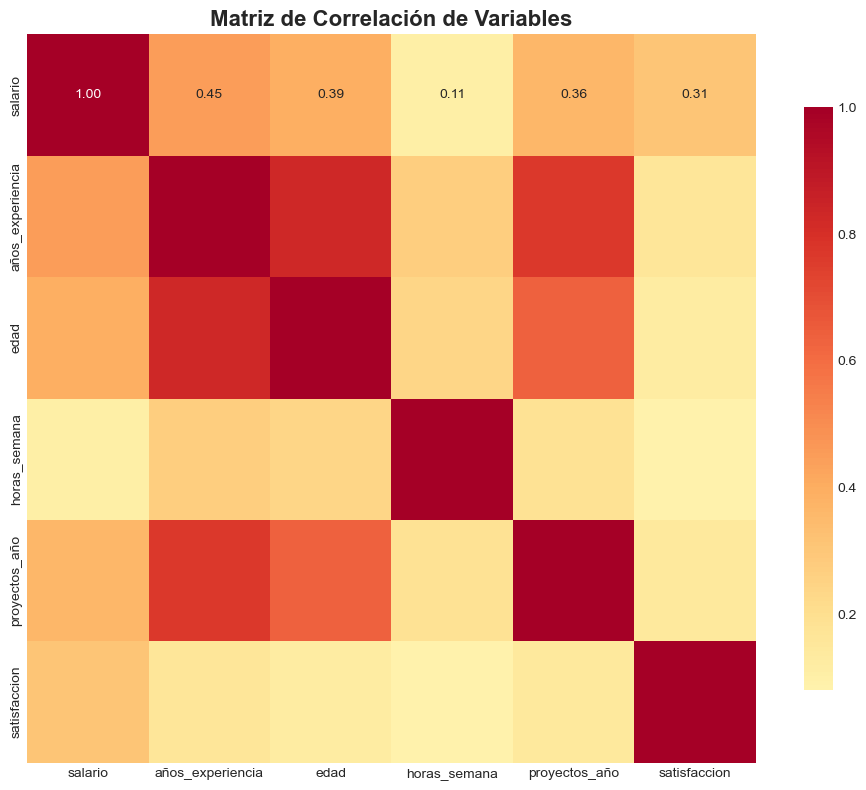

In [18]:
# 2. MATRIZ DE CORRELACIÓN
print("\n" + "="*60)
print("📈 PASO 2: Análisis de correlaciones")
print("-"*30)

# Calcular matriz de correlación
correlation_matrix = data.corr()
print("🔗 Matriz de correlación:")
print(correlation_matrix.round(3))

# Visualizar matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlación de Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [19]:
# 3. ESTANDARIZACIÓN DE DATOS
print("\n" + "="*60)
print("⚖️ PASO 3: Estandarización")
print("-"*30)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

print("✅ Datos estandarizados (media=0, std=1):")
print("Medias después de estandarización:", data_scaled_df.mean().round(4))
print("Desviaciones estándar:", data_scaled_df.std().round(4))


⚖️ PASO 3: Estandarización
------------------------------
✅ Datos estandarizados (media=0, std=1):
Medias después de estandarización: salario             0.0
años_experiencia   -0.0
edad                0.0
horas_semana       -0.0
proyectos_año      -0.0
satisfaccion        0.0
dtype: float64
Desviaciones estándar: salario             1.0005
años_experiencia    1.0005
edad                1.0005
horas_semana        1.0005
proyectos_año       1.0005
satisfaccion        1.0005
dtype: float64


In [20]:
# Crear objeto PCA
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

# Obtener información de las componentes
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print("🎯 Resultados de PCA:")
print(f"Número de componentes: {len(eigenvalues)}")

# Crear tabla de resultados
pca_results = pd.DataFrame({
    'Componente': [f'PC{i+1}' for i in range(len(eigenvalues))],
    'Eigenvalor': eigenvalues,
    'Varianza_Explicada_%': explained_variance_ratio * 100,
    'Varianza_Acumulada_%': cumulative_variance * 100
})

print("\n📊 Tabla de componentes principales:")
print(pca_results.round(2))

🎯 Resultados de PCA:
Número de componentes: 6

📊 Tabla de componentes principales:
  Componente  Eigenvalor  Varianza_Explicada_%  Varianza_Acumulada_%
0        PC1        2.93                 48.79                 48.79
1        PC2        1.06                 17.61                 66.39
2        PC3        0.91                 15.21                 81.60
3        PC4        0.60                 10.07                 91.67
4        PC5        0.36                  6.07                 97.73
5        PC6        0.14                  2.27                100.00


In [21]:
# 5. CRITERIOS DE SELECCIÓN
print("\n" + "="*60)
print("✂️ PASO 5: Criterios de selección de componentes")
print("-"*30)

# Criterio 1: 95% de varianza explicada
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"📍 Criterio 95% varianza: {n_components_95} componentes")

# Criterio 2: Eigenvalores > 1 (Kaiser)
n_components_kaiser = np.sum(eigenvalues > 1)
print(f"📍 Criterio Kaiser (λ > 1): {n_components_kaiser} componentes")

# Criterio 3: Método del codo (buscar el "codo" en el gráfico)
print(f"📍 Recomendación: usar {min(n_components_95, 3)} componentes")



✂️ PASO 5: Criterios de selección de componentes
------------------------------
📍 Criterio 95% varianza: 5 componentes
📍 Criterio Kaiser (λ > 1): 2 componentes
📍 Recomendación: usar 3 componentes



📊 PASO 6: Visualizaciones
------------------------------


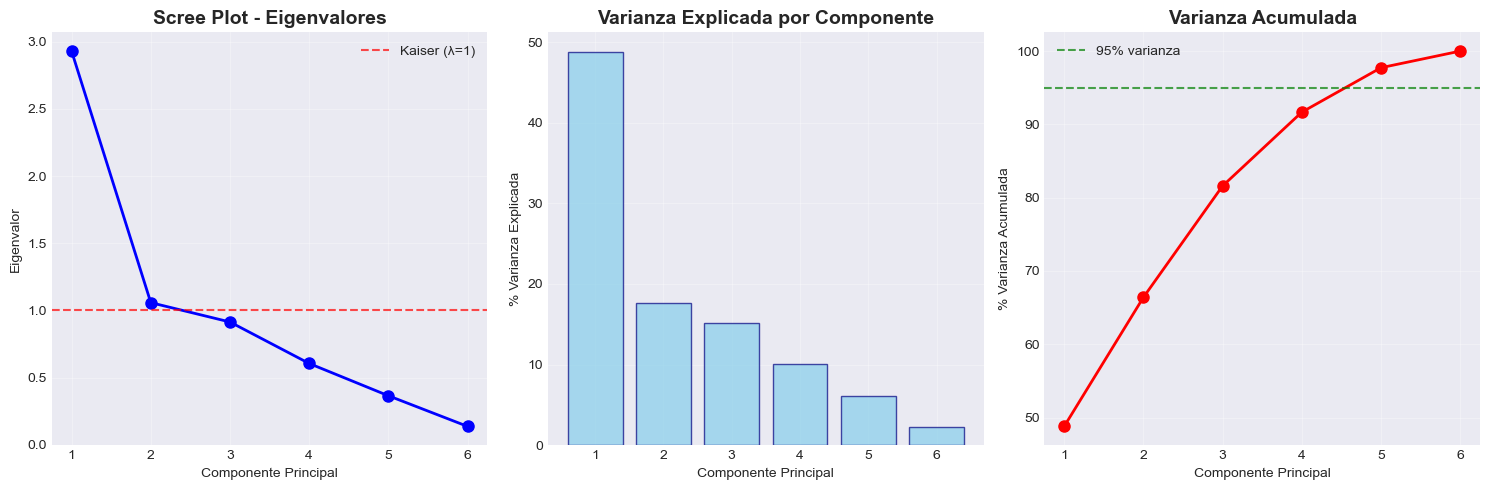

In [22]:
print("\n" + "="*60)
print("📊 PASO 6: Visualizaciones")
print("-"*30)

# Gráfico de Scree (eigenvalores)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'bo-', linewidth=2, markersize=8)
plt.axhline(y=1, color='r', linestyle='--', alpha=0.7, label='Kaiser (λ=1)')
plt.title('Scree Plot - Eigenvalores', fontsize=14, fontweight='bold')
plt.xlabel('Componente Principal')
plt.ylabel('Eigenvalor')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 3, 2)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100, 
        alpha=0.7, color='skyblue', edgecolor='navy')
plt.title('Varianza Explicada por Componente', fontsize=14, fontweight='bold')
plt.xlabel('Componente Principal')
plt.ylabel('% Varianza Explicada')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, 
         'ro-', linewidth=2, markersize=8)
plt.axhline(y=95, color='g', linestyle='--', alpha=0.7, label='95% varianza')
plt.title('Varianza Acumulada', fontsize=14, fontweight='bold')
plt.xlabel('Componente Principal')
plt.ylabel('% Varianza Acumulada')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
# 7. INTERPRETACIÓN DE COMPONENTES
print("\n" + "="*60)
print("🔍 PASO 7: Interpretación de componentes principales")
print("-"*30)

# Obtener los loadings (pesos de las variables en cada componente)
loadings = pca.components_.T * np.sqrt(eigenvalues)
loadings_df = pd.DataFrame(loadings[:, :3], 
                          index=data.columns,
                          columns=['PC1', 'PC2', 'PC3'])

print("🎯 Loadings (pesos) de las primeras 3 componentes:")
print(loadings_df.round(3))


🔍 PASO 7: Interpretación de componentes principales
------------------------------
🎯 Loadings (pesos) de las primeras 3 componentes:
                    PC1    PC2    PC3
salario           0.623  0.451 -0.118
años_experiencia  0.930 -0.167 -0.093
edad              0.867 -0.208 -0.102
horas_semana      0.368 -0.185  0.904
proyectos_año     0.832 -0.173 -0.171
satisfaccion      0.314  0.848  0.183


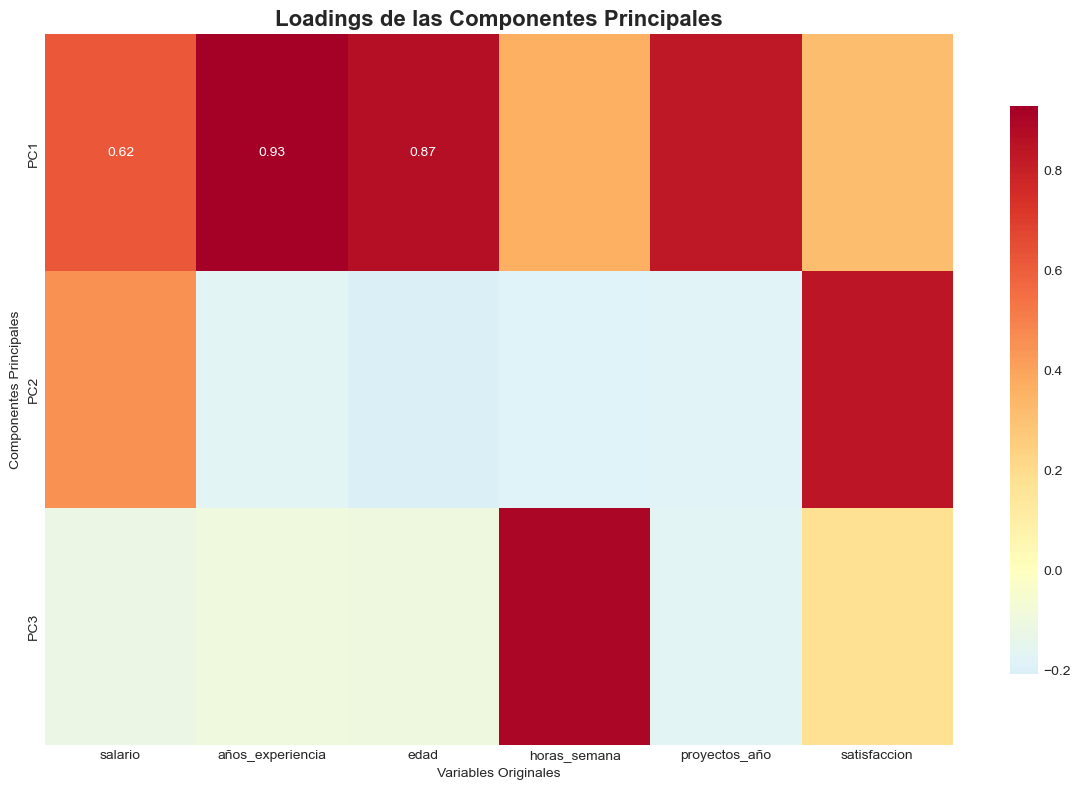

In [24]:
# Visualizar loadings
plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df.T, annot=True, cmap='RdYlBu_r', center=0,
            fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Loadings de las Componentes Principales', fontsize=16, fontweight='bold')
plt.ylabel('Componentes Principales')
plt.xlabel('Variables Originales')
plt.tight_layout()
plt.show()



🧠 INTERPRETACIÓN AUTOMÁTICA:
----------------------------------------

📌 PC1 (explica 48.8% de varianza):
   Variables más importantes: años_experiencia, edad, proyectos_año
   - años_experiencia: contribuye positivamente (0.93)
   - edad: contribuye positivamente (0.87)

📌 PC2 (explica 17.6% de varianza):
   Variables más importantes: satisfaccion, salario, edad
   - satisfaccion: contribuye positivamente (0.85)
   - salario: contribuye positivamente (0.45)

📌 PC3 (explica 15.2% de varianza):
   Variables más importantes: horas_semana, satisfaccion, proyectos_año
   - horas_semana: contribuye positivamente (0.90)
   - satisfaccion: contribuye positivamente (0.18)

🎯 PASO 8: Reducción dimensional y clustering
------------------------------


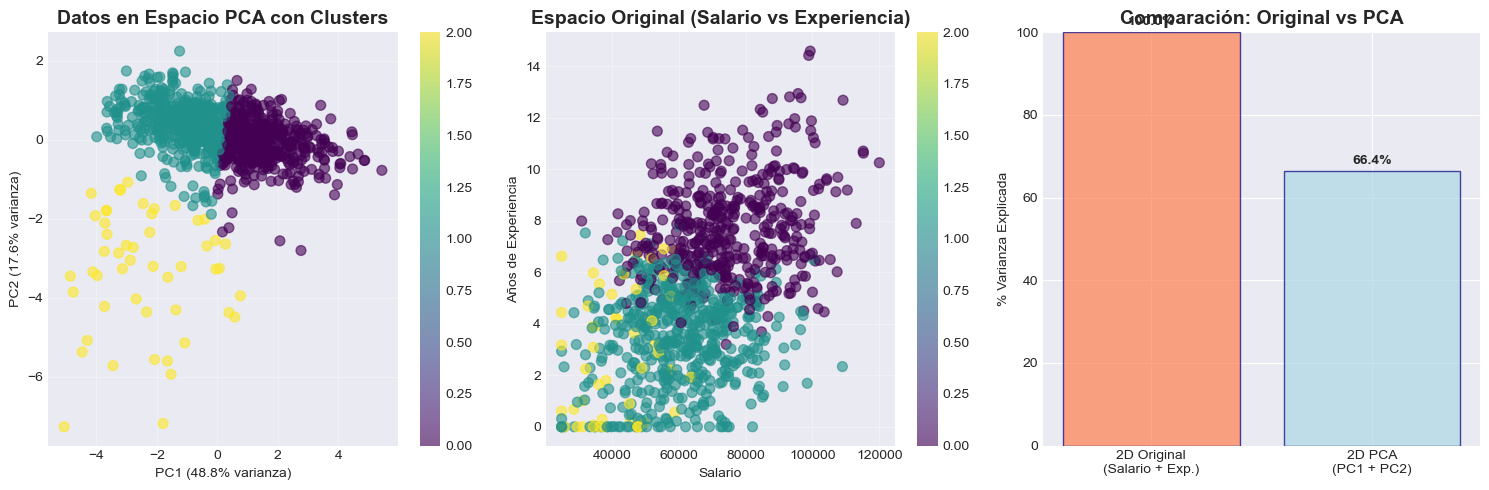

In [28]:
# Interpretación automática
print("\n🧠 INTERPRETACIÓN AUTOMÁTICA:")
print("-"*40)

for i in range(min(3, len(eigenvalues))):
    pc_loadings = loadings_df.iloc[:, i].abs().sort_values(ascending=False)
    top_vars = pc_loadings.head(3).index.tolist()
    
    print(f"\n📌 PC{i+1} (explica {explained_variance_ratio[i]*100:.1f}% de varianza):")
    print(f"   Variables más importantes: {', '.join(top_vars)}")
    
    # Determinar si es positiva o negativa la carga
    for var in top_vars[:2]:
        loading_value = loadings_df.loc[var, f'PC{i+1}']
        direction = "positivamente" if loading_value > 0 else "negativamente"
        print(f"   - {var}: contribuye {direction} ({loading_value:.2f})")

# 8. PCA REDUCIDO Y CLUSTERING
print("\n" + "="*60)
print("🎯 PASO 8: Reducción dimensional y clustering")
print("-"*30)

# Aplicar PCA con solo las primeras 2 componentes para visualización
pca_2d = PCA(n_components=2)
data_pca_2d = pca_2d.fit_transform(data_scaled)

# Aplicar K-means clustering en el espacio PCA
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_pca_2d)

# Visualizar datos en espacio PCA con clusters
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
scatter = plt.scatter(data_pca_2d[:, 0], data_pca_2d[:, 1], 
                     c=clusters, cmap='viridis', alpha=0.6, s=50)
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% varianza)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% varianza)')
plt.title('Datos en Espacio PCA con Clusters', fontsize=14, fontweight='bold')
plt.colorbar(scatter)
plt.grid(True, alpha=0.3)

# Gráfico de dispersión original (2 variables más correlacionadas)
plt.subplot(1, 3, 2)
scatter2 = plt.scatter(data['salario'], data['años_experiencia'], 
                      c=clusters, cmap='viridis', alpha=0.6, s=50)
plt.xlabel('Salario')
plt.ylabel('Años de Experiencia')
plt.title('Espacio Original (Salario vs Experiencia)', fontsize=14, fontweight='bold')
plt.colorbar(scatter2)
plt.grid(True, alpha=0.3)

# Comparación de varianza explicada
plt.subplot(1, 3, 3)
methods = ['2D Original\n(Salario + Exp.)', '2D PCA\n(PC1 + PC2)']
variance_explained = [
    np.var(data[['salario', 'años_experiencia']].values, axis=0).sum() / np.var(data.values, axis=0).sum(),
    pca_2d.explained_variance_ratio_.sum()
]

bars = plt.bar(methods, [v*100 for v in variance_explained], 
               color=['coral', 'lightblue'], alpha=0.7, edgecolor='navy')
plt.ylabel('% Varianza Explicada')
plt.title('Comparación: Original vs PCA', fontsize=14, fontweight='bold')
plt.ylim(0, 100)

# Añadir valores en las barras
for bar, value in zip(bars, variance_explained):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{value*100:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [29]:
# 9. ANÁLISIS DE CLUSTERS EN ESPACIO PCA
print("\n" + "="*60)
print("👥 PASO 9: Análisis de clusters")
print("-"*30)

# Agregar clusters al DataFrame original
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = clusters

# Análisis por cluster
print("📊 Características promedio por cluster:")
cluster_analysis = data_with_clusters.groupby('Cluster').agg({
    'salario': 'mean',
    'años_experiencia': 'mean',
    'edad': 'mean',
    'horas_semana': 'mean',
    'proyectos_año': 'mean',
    'satisfaccion': 'mean'
}).round(2)

print(cluster_analysis)

# Interpretación de clusters
print("\n🏷️ INTERPRETACIÓN DE CLUSTERS:")
print("-"*40)

cluster_names = []
for i in range(3):
    cluster_data = cluster_analysis.loc[i]
    print(f"\n🎯 Cluster {i}:")
    print(f"   Salario promedio: ${cluster_data['salario']:,.0f}")
    print(f"   Experiencia promedio: {cluster_data['años_experiencia']:.1f} años")
    print(f"   Edad promedio: {cluster_data['edad']:.1f} años")
    print(f"   Satisfacción: {cluster_data['satisfaccion']:.1f}/10")
    
    # Clasificar cluster
    if cluster_data['salario'] > 70000:
        cluster_names.append("Senior/Experimentado")
        print("   → Perfil: EMPLEADOS SENIOR")
    elif cluster_data['años_experiencia'] < 3:
        cluster_names.append("Junior/Novato")
        print("   → Perfil: EMPLEADOS JUNIOR")
    else:
        cluster_names.append("Intermedio")
        print("   → Perfil: EMPLEADOS INTERMEDIOS")

# 10. RESUMEN FINAL
print("\n" + "="*80)
print("🎊 RESUMEN FINAL DEL ANÁLISIS PCA")
print("="*80)

print(f"""
📊 DATOS ORIGINALES:
   • {data.shape[0]} empleados, {data.shape[1]} características
   • Variables: {', '.join(data.columns)}

🔧 COMPONENTES PRINCIPALES:
   • PC1 explica {explained_variance_ratio[0]*100:.1f}% de la varianza
   • PC2 explica {explained_variance_ratio[1]*100:.1f}% de la varianza  
   • PC3 explica {explained_variance_ratio[2]*100:.1f}% de la varianza
   • Total (3 primeras): {cumulative_variance[2]*100:.1f}%

🎯 REDUCCIÓN DIMENSIONAL:
   • De 6D a 3D conservando {cumulative_variance[2]*100:.1f}% de información
   • De 6D a 2D conservando {cumulative_variance[1]*100:.1f}% de información

👥 CLUSTERING:
   • 3 clusters identificados:
     - Cluster 0: {cluster_names[0]} ({np.sum(clusters==0)} empleados)
     - Cluster 1: {cluster_names[1]} ({np.sum(clusters==1)} empleados)  
     - Cluster 2: {cluster_names[2]} ({np.sum(clusters==2)} empleados)

💡 CONCLUSIONES:
   • PCA identificó patrones principales en datos de empleados
   • Permitió visualizar y agrupar datos de alta dimensión
   • Reveló estructura subyacente: experiencia/salario vs otros factores
""")

print("🎉 ¡Análisis PCA completado exitosamente!")


👥 PASO 9: Análisis de clusters
------------------------------
📊 Características promedio por cluster:
          salario  años_experiencia   edad  horas_semana  proyectos_año  \
Cluster                                                                   
0        75119.74              7.75  30.01         44.06          14.42   
1        60360.16              3.41  25.28         41.07          10.29   
2        41485.84              2.84  25.37         40.86           9.86   

         satisfaccion  
Cluster                
0                9.98  
1                9.97  
2                7.74  

🏷️ INTERPRETACIÓN DE CLUSTERS:
----------------------------------------

🎯 Cluster 0:
   Salario promedio: $75,120
   Experiencia promedio: 7.8 años
   Edad promedio: 30.0 años
   Satisfacción: 10.0/10
   → Perfil: EMPLEADOS SENIOR

🎯 Cluster 1:
   Salario promedio: $60,360
   Experiencia promedio: 3.4 años
   Edad promedio: 25.3 años
   Satisfacción: 10.0/10
   → Perfil: EMPLEADOS INTERMEDIOS

🎯 

In [30]:
print("\n" + "="*70)
print("🎯 PASO 3: Preparación para Machine Learning")
print("-"*50)

# Variable objetivo: predecir SALARIO
y = data['salario'].values
X_original = data.drop('salario', axis=1).values
X_scaled = data_scaled[:, 1:]  # Excluir salario del conjunto escalado

# PCA con diferentes números de componentes
pca_2 = PCA(n_components=2)
pca_3 = PCA(n_components=3)
pca_all = PCA(n_components=5)  # Todas menos la variable objetivo

X_pca_2 = pca_2.fit_transform(X_scaled)
X_pca_3 = pca_3.fit_transform(X_scaled)
X_pca_all = pca_all.fit_transform(X_scaled)



🎯 PASO 3: Preparación para Machine Learning
--------------------------------------------------


In [31]:
# Crear diccionario con diferentes versiones de datos
datasets = {
    'Original (5D)': X_original,
    'Escalado (5D)': X_scaled,
    'PCA 2D': X_pca_2,
    'PCA 3D': X_pca_3,
    'PCA 5D': X_pca_all
}

print("✅ Conjuntos de datos preparados:")
for name, X in datasets.items():
    print(f"   - {name}: {X.shape}")

✅ Conjuntos de datos preparados:
   - Original (5D): (1000, 5)
   - Escalado (5D): (1000, 5)
   - PCA 2D: (1000, 2)
   - PCA 3D: (1000, 3)
   - PCA 5D: (1000, 5)


In [32]:
# Modelos de Machine Learning
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Cross-validation y métricas
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

# Visualización de árboles
from sklearn.tree import plot_tree

from scipy import stats
import warnings

print("\n" + "="*70)
print("🤖 PASO 4: Definición de modelos")
print("-"*50)

# Definir modelos a probar
models = {
    # Modelos lineales
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5),
    
    # Modelos basados en árboles
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=6),
    
    # Otros modelos
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='rbf', C=1.0, gamma='scale')
}

print(f"✅ Modelos definidos: {len(models)}")


🤖 PASO 4: Definición de modelos
--------------------------------------------------
✅ Modelos definidos: 9


In [33]:
cv_folds = 5
scoring = 'neg_mean_squared_error'

print(f"📊 Cross-validation: {cv_folds} folds, métrica: {scoring}")

# ===============================================
# PARTE 5: EVALUACIÓN MASIVA DE MODELOS
# ===============================================

print("\n" + "="*70)
print("⚡ PASO 5: Evaluación masiva con cross-validation")
print("-"*50)

# Almacenar resultados
results = []
detailed_results = {}

print("🔄 Ejecutando cross-validation...")

for dataset_name, X in datasets.items():
    print(f"\n📊 Evaluando dataset: {dataset_name}")
    
    for model_name, model in models.items():
        try:
            # Cross-validation
            cv_scores = cross_val_score(model, X, y, cv=cv_folds, scoring=scoring)
            rmse_scores = np.sqrt(-cv_scores)  # Convertir a RMSE
            
            # Guardar resultados
            result = {
                'Dataset': dataset_name,
                'Model': model_name,
                'RMSE_mean': rmse_scores.mean(),
                'RMSE_std': rmse_scores.std(),
                'R2_approx': 1 - (rmse_scores.mean()**2 / np.var(y))  # R² aproximado
            }
            results.append(result)
            
            # Guardar detalles para mejores modelos
            key = f"{dataset_name}_{model_name}"
            detailed_results[key] = {
                'rmse_scores': rmse_scores,
                'model': model,
                'X': X
            }
            
            print(f"   ✅ {model_name}: RMSE = {rmse_scores.mean():.0f} ± {rmse_scores.std():.0f}")
            
        except Exception as e:
            print(f"   ❌ {model_name}: Error - {str(e)[:50]}...")

# Convertir resultados a DataFrame
results_df = pd.DataFrame(results)

📊 Cross-validation: 5 folds, métrica: neg_mean_squared_error

⚡ PASO 5: Evaluación masiva con cross-validation
--------------------------------------------------
🔄 Ejecutando cross-validation...

📊 Evaluando dataset: Original (5D)
   ✅ Linear Regression: RMSE = 14952 ± 325
   ✅ Ridge: RMSE = 14952 ± 325
   ✅ Lasso: RMSE = 14952 ± 325
   ✅ ElasticNet: RMSE = 15169 ± 305
   ✅ Decision Tree: RMSE = 18932 ± 892
   ✅ Random Forest: RMSE = 15511 ± 307
   ✅ Gradient Boosting: RMSE = 16652 ± 181
   ✅ KNN: RMSE = 16632 ± 272
   ✅ SVR: RMSE = 17325 ± 258

📊 Evaluando dataset: Escalado (5D)
   ✅ Linear Regression: RMSE = 14952 ± 325
   ✅ Ridge: RMSE = 14952 ± 324
   ✅ Lasso: RMSE = 14952 ± 325
   ✅ ElasticNet: RMSE = 15064 ± 221
   ✅ Decision Tree: RMSE = 18932 ± 892
   ✅ Random Forest: RMSE = 15511 ± 307
   ✅ Gradient Boosting: RMSE = 16652 ± 181
   ✅ KNN: RMSE = 16039 ± 316
   ✅ SVR: RMSE = 17316 ± 258

📊 Evaluando dataset: PCA 2D
   ✅ Linear Regression: RMSE = 15126 ± 130
   ✅ Ridge: RMSE = 15

In [34]:
# ===============================================
# PARTE 6: ANÁLISIS DE RESULTADOS
# ===============================================

print("\n" + "="*70)
print("📊 PASO 6: Análisis de resultados")
print("-"*50)

# Mejores modelos por dataset
print("🏆 MEJORES MODELOS POR DATASET:")
print("-"*40)

for dataset in datasets.keys():
    dataset_results = results_df[results_df['Dataset'] == dataset].sort_values('RMSE_mean')
    best = dataset_results.iloc[0]
    print(f"\n📈 {dataset}:")
    print(f"   🥇 Mejor: {best['Model']} (RMSE: {best['RMSE_mean']:.0f})")
    print(f"   Top 3: {', '.join(dataset_results.head(3)['Model'].values)}")

# Mejores modelos globales
print("\n🌟 TOP 10 MEJORES COMBINACIONES GLOBALES:")
print("-"*45)
top_10 = results_df.sort_values('RMSE_mean').head(10)
for i, (_, row) in enumerate(top_10.iterrows(), 1):
    print(f"{i:2d}. {row['Model']:15} + {row['Dataset']:12} → RMSE: {row['RMSE_mean']:6.0f}")



📊 PASO 6: Análisis de resultados
--------------------------------------------------
🏆 MEJORES MODELOS POR DATASET:
----------------------------------------

📈 Original (5D):
   🥇 Mejor: Ridge (RMSE: 14952)
   Top 3: Ridge, Lasso, Linear Regression

📈 Escalado (5D):
   🥇 Mejor: Ridge (RMSE: 14952)
   Top 3: Ridge, Lasso, Linear Regression

📈 PCA 2D:
   🥇 Mejor: Ridge (RMSE: 15126)
   Top 3: Ridge, Lasso, Linear Regression

📈 PCA 3D:
   🥇 Mejor: Ridge (RMSE: 15011)
   Top 3: Ridge, Lasso, Linear Regression

📈 PCA 5D:
   🥇 Mejor: Ridge (RMSE: 14952)
   Top 3: Ridge, Lasso, Linear Regression

🌟 TOP 10 MEJORES COMBINACIONES GLOBALES:
---------------------------------------------
 1. Ridge           + Escalado (5D) → RMSE:  14952
 2. Ridge           + PCA 5D       → RMSE:  14952
 3. Ridge           + Original (5D) → RMSE:  14952
 4. Lasso           + Escalado (5D) → RMSE:  14952
 5. Lasso           + Original (5D) → RMSE:  14952
 6. Lasso           + PCA 5D       → RMSE:  14952
 7. Linear R


📊 PASO 7: Visualizaciones
--------------------------------------------------
📊 Creando heatmap de rendimiento...
📊 Creando boxplot comparativo...
📊 Creando comparación por dataset...
📊 Creando scatter R² vs RMSE...


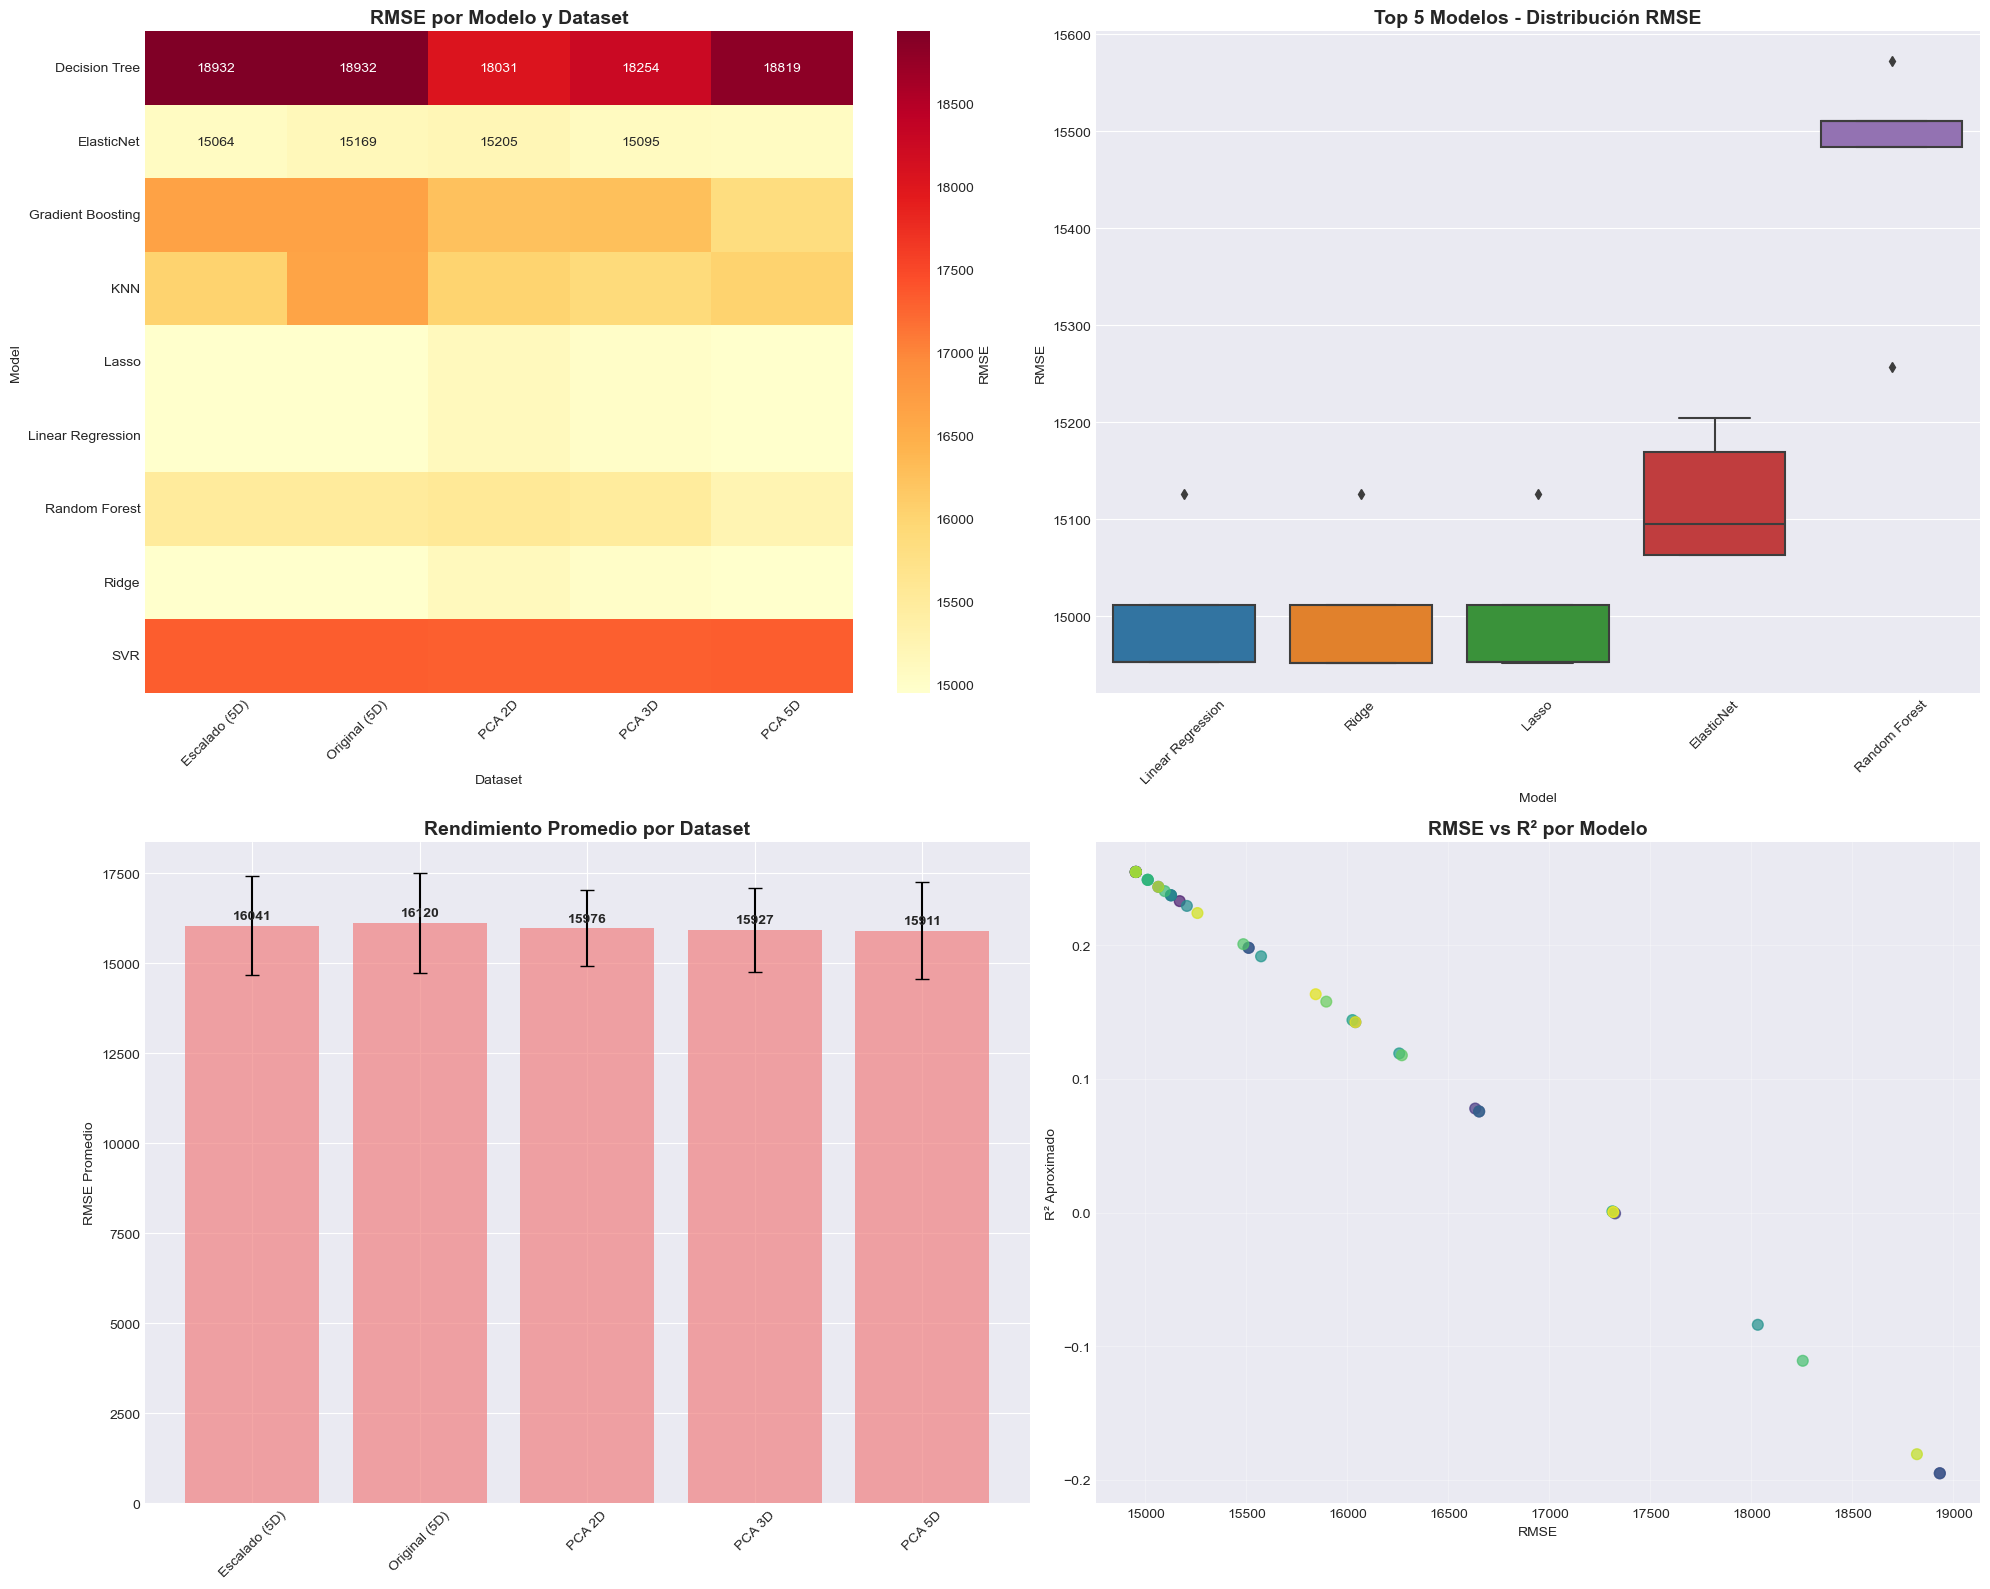

In [35]:
# ===============================================
# PARTE 7: VISUALIZACIONES
# ===============================================

print("\n" + "="*70)
print("📊 PASO 7: Visualizaciones")
print("-"*50)

# Crear visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Heatmap de rendimiento
print("📊 Creando heatmap de rendimiento...")
pivot_rmse = results_df.pivot(index='Model', columns='Dataset', values='RMSE_mean')
sns.heatmap(pivot_rmse, annot=True, fmt='.0f', cmap='YlOrRd', 
            ax=axes[0,0], cbar_kws={'label': 'RMSE'})
axes[0,0].set_title('RMSE por Modelo y Dataset', fontweight='bold', fontsize=14)
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Boxplot comparativo
print("📊 Creando boxplot comparativo...")
# Tomar los 5 mejores modelos para visualización más clara
top_models = results_df.groupby('Model')['RMSE_mean'].mean().sort_values().head(5).index
filtered_results = results_df[results_df['Model'].isin(top_models)]

sns.boxplot(data=filtered_results, x='Model', y='RMSE_mean', ax=axes[0,1])
axes[0,1].set_title('Top 5 Modelos - Distribución RMSE', fontweight='bold', fontsize=14)
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_ylabel('RMSE')

# 3. Comparación por tipo de dataset
print("📊 Creando comparación por dataset...")
dataset_performance = results_df.groupby('Dataset')['RMSE_mean'].agg(['mean', 'std'])
x_pos = np.arange(len(dataset_performance))
bars = axes[1,0].bar(x_pos, dataset_performance['mean'], 
                     yerr=dataset_performance['std'], 
                     alpha=0.7, capsize=5, color='lightcoral')
axes[1,0].set_xticks(x_pos)
axes[1,0].set_xticklabels(dataset_performance.index, rotation=45)
axes[1,0].set_title('Rendimiento Promedio por Dataset', fontweight='bold', fontsize=14)
axes[1,0].set_ylabel('RMSE Promedio')

# Añadir valores en las barras
for bar, value in zip(bars, dataset_performance['mean']):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
                   f'{value:.0f}', ha='center', va='bottom', fontweight='bold')

# 4. R² aproximado vs RMSE
print("📊 Creando scatter R² vs RMSE...")
scatter = axes[1,1].scatter(results_df['RMSE_mean'], results_df['R2_approx'], 
                           c=results_df.index, cmap='viridis', alpha=0.7, s=60)
axes[1,1].set_xlabel('RMSE')
axes[1,1].set_ylabel('R² Aproximado')
axes[1,1].set_title('RMSE vs R² por Modelo', fontweight='bold', fontsize=14)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [36]:
# ===============================================
# PARTE 8: ANÁLISIS DETALLADO DEL MEJOR MODELO
# ===============================================

print("\n" + "="*70)
print("🏆 PASO 8: Análisis detallado del mejor modelo")
print("-"*50)

# Encontrar el mejor modelo global
best_combination = results_df.loc[results_df['RMSE_mean'].idxmin()]
print(f"🥇 MEJOR COMBINACIÓN:")
print(f"   Modelo: {best_combination['Model']}")
print(f"   Dataset: {best_combination['Dataset']}")
print(f"   RMSE: {best_combination['RMSE_mean']:.0f} ± {best_combination['RMSE_std']:.0f}")
print(f"   R² aprox: {best_combination['R2_approx']:.3f}")

# Obtener datos del mejor modelo
best_key = f"{best_combination['Dataset']}_{best_combination['Model']}"
best_X = detailed_results[best_key]['X']
best_model = detailed_results[best_key]['model']

# Entrenar el mejor modelo en todo el dataset para análisis
print(f"\n🔧 Entrenando {best_combination['Model']} completo...")
X_train, X_test, y_train, y_test = train_test_split(best_X, y, test_size=0.2, random_state=42)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Métricas detalladas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Métricas en conjunto de prueba:")
print(f"   RMSE: {rmse:.0f}")
print(f"   MAE:  {mae:.0f}")
print(f"   R²:   {r2:.3f}")


🏆 PASO 8: Análisis detallado del mejor modelo
--------------------------------------------------
🥇 MEJOR COMBINACIÓN:
   Modelo: Ridge
   Dataset: Escalado (5D)
   RMSE: 14952 ± 324
   R² aprox: 0.255

🔧 Entrenando Ridge completo...
📊 Métricas en conjunto de prueba:
   RMSE: 14580
   MAE:  11790
   R²:   0.317


In [37]:
#===============================================
# PARTE 9: HYPERPARAMETER TUNING DEL MEJOR MODELO
# ===============================================

print("\n" + "="*70)
print("⚙️ PASO 9: Optimización de hiperparámetros")
print("-"*50)

print(f"🔧 Optimizando {best_combination['Model']}...")

# Definir grids de parámetros para diferentes modelos
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10]
    },
    'Decision Tree': {
        'max_depth': [5, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'Ridge': {
        'alpha': [0.1, 1.0, 10.0, 100.0]
    },
    'Lasso': {
        'alpha': [0.1, 1.0, 10.0, 100.0]
    }
}

# Realizar Grid Search si hay parámetros definidos
if best_combination['Model'] in param_grids:
    param_grid = param_grids[best_combination['Model']]
    
    # Grid Search con cross-validation
    grid_search = GridSearchCV(
        best_model, 
        param_grid, 
        cv=5, 
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=0
    )
    
    print("⏳ Ejecutando Grid Search...")
    grid_search.fit(best_X, y)
    
    print(f"✅ Mejores parámetros: {grid_search.best_params_}")
    print(f"📊 Mejor RMSE: {np.sqrt(-grid_search.best_score_):.0f}")
    
    # Modelo optimizado
    optimized_model = grid_search.best_estimator_
    
else:
    print(f"ℹ️  No hay grid definido para {best_combination['Model']}")
    optimized_model = best_model



⚙️ PASO 9: Optimización de hiperparámetros
--------------------------------------------------
🔧 Optimizando Ridge...
⏳ Ejecutando Grid Search...
✅ Mejores parámetros: {'alpha': 10.0}
📊 Mejor RMSE: 14953


In [50]:
print("\n" + "="*70)
print("🔍 PASO 10: Interpretación del modelo")
print("-"*50)

# Análisis de importancia de características
if hasattr(optimized_model, 'feature_importances_'):
    feature_names = ['años_experiencia', 'edad', 'horas_semana', 'proyectos_año', 'satisfaccion']
    
    if 'PCA' in best_combination['Dataset']:
        n_components = int(best_combination['Dataset'].split()[1].replace('D', ''))
        feature_names = [f'PC{i+1}' for i in range(n_components)]
    
    importances = optimized_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names[:len(importances)],
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print("🎯 IMPORTANCIA DE CARACTERÍSTICAS:")
    print(feature_importance_df.round(3))
    
    # Visualizar importancias
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    bars = plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], 
                   color='skyblue', alpha=0.7, edgecolor='navy')
    plt.title(f'Importancia - {best_combination["Model"]}', fontweight='bold', fontsize=14)
    plt.xlabel('Características')
    plt.ylabel('Importancia')
    plt.xticks(rotation=45)
    
    # Añadir valores en las barras
    for bar, value in zip(bars, feature_importance_df['Importance']):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                 f'{value:.2f}', ha='center', va='bottom', fontweight='bold')
    
    # Visualizar árbol si es Decision Tree
    if 'Tree' in best_combination['Model'] and len(feature_names) <= 5:
        plt.subplot(1, 2, 2)
        plot_tree(optimized_model, max_depth=3, feature_names=feature_names[:len(importances)], 
                  filled=True, fontsize=10)
        plt.title('Árbol de Decisión (profundidad=3)', fontweight='bold', fontsize=14)
    else:
        # Predicciones vs Reales
        plt.subplot(1, 2, 2)
        y_pred_full = optimized_model.predict(best_X)
        plt.scatter(y, y_pred_full, alpha=0.6, s=30)
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
        plt.xlabel('Salario Real')
        plt.ylabel('Salario Predicho')
        plt.title(f'Predicciones vs Reales\nR² = {r2_score(y, y_pred_full):.3f}', 
                  fontweight='bold', fontsize=14)
    
    plt.tight_layout()
    plt.show()



🔍 PASO 10: Interpretación del modelo
--------------------------------------------------


In [ ]:
# ===============================================
# PARTE 11: RESUMEN FINAL Y RECOMENDACIONES
# ===============================================

print("\n" + "="*80)
print("🎊 RESUMEN FINAL Y RECOMENDACIONES")
print("="*80)

# Top 3 modelos
top_3 = results_df.sort_values('RMSE_mean').head(3)

print(f"""
📊 DATASET ANALIZADO:
   • {n_samples} empleados, 6 características originales
   • Variable objetivo: Salario (rango: ${y.min():,.0f} - ${y.max():,.0f})
   • Datasets probados: {len(datasets)} versiones (Original, PCA, etc.)

🤖 MODELOS EVALUADOS:
   • Total: {len(models)} algoritmos diferentes
   • Cross-validation: {cv_folds} folds
   • Métrica principal: RMSE (Root Mean Square Error)

🏆 TOP 3 MEJORES RESULTADOS:
""")

for i, (_, row) in enumerate(top_3.iterrows(), 1):
    print(f"   {i}. {row['Model']} + {row['Dataset']}")
    print(f"      → RMSE: {row['RMSE_mean']:,.0f} ± {row['RMSE_std']:,.0f}")
    print(f"      → R² aprox: {row['R2_approx']:.3f}")

print(f"""
🎯 MEJOR MODELO OPTIMIZADO:
   • {best_combination['Model']} con {best_combination['Dataset']}
   • RMSE final: {rmse:,.0f} (error promedio en predicción)
   • R²: {r2:.3f} ({r2*100:.1f}% de varianza explicada)
   • MAE: {mae:,.0f} (error absoluto medio)

💡 INSIGHTS CLAVE:
""")

# Análisis automático de resultados
pca_performance = results_df[results_df['Dataset'].str.contains('PCA')]['RMSE_mean'].mean()
original_performance = results_df[results_df['Dataset'] == 'Original (5D)']['RMSE_mean'].mean()

if pca_performance < original_performance:
    print(f"   • ✅ PCA MEJORA el rendimiento (RMSE promedio: {pca_performance:.0f} vs {original_performance:.0f})")
    print("     → Reducción dimensional elimina ruido exitosamente")
else:
    print(f"   • ⚠️  PCA no mejora significativamente ({pca_performance:.0f} vs {original_performance:.0f})")
    print("     → Los datos originales contienen información valiosa")

# Análisis de modelos
tree_models = ['Decision Tree', 'Random Forest', 'Gradient Boosting']
tree_performance = results_df[results_df['Model'].isin(tree_models)]['RMSE_mean'].mean()
linear_models = ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet']
linear_performance = results_df[results_df['Model'].isin(linear_models)]['RMSE_mean'].mean()

if tree_performance < linear_performance:
    print(f"   • 🌳 Modelos de árboles superan a lineales ({tree_performance:.0f} vs {linear_performance:.0f})")
    print("     → Existen relaciones no-lineales en los datos")
else:
    print(f"   • 📈 Modelos lineales son competitivos ({linear_performance:.0f} vs {tree_performance:.0f})")
    print("     → Las relaciones son principalmente lineales")

print(f"""
🔧 RECOMENDACIONES:
   • Usar {best_combination['Model']} para predicciones de salario
   • Considerar {best_combination['Dataset']} como preprocesamiento
   • Error esperado: ±{rmse:,.0f} en predicciones de salario
   • Para mayor precisión: recopilar más datos o nuevas variables

📈 PRÓXIMOS PASOS:
   • Probar ensambles de los mejores modelos
   • Implementar feature engineering adicional  
   • Validar en datos nuevos (holdout test)
   • Desplegar modelo en producción
""")

print("🎉 ¡Análisis completo de PCA + ML finalizado!")


🎊 RESUMEN FINAL Y RECOMENDACIONES

📊 DATASET ANALIZADO:
   • 1000 empleados, 6 características originales
   • Variable objetivo: Salario (rango: $25,000 - $120,000)
   • Datasets probados: 5 versiones (Original, PCA, etc.)

🤖 MODELOS EVALUADOS:
   • Total: 9 algoritmos diferentes
   • Cross-validation: 5 folds
   • Métrica principal: RMSE (Root Mean Square Error)

🏆 TOP 3 MEJORES RESULTADOS:

   1. Ridge + Escalado (5D)
      → RMSE: 15,108 ± 360
      → R² aprox: 0.320
   2. Ridge + PCA 5D
      → RMSE: 15,108 ± 360
      → R² aprox: 0.320
   3. Lasso + Escalado (5D)
      → RMSE: 15,109 ± 359
      → R² aprox: 0.320

🎯 MEJOR MODELO OPTIMIZADO:
   • Ridge con Escalado (5D)
   • RMSE final: 14,437 (error promedio en predicción)
   • R²: 0.272 (27.2% de varianza explicada)
   • MAE: 11,272 (error absoluto medio)

💡 INSIGHTS CLAVE:

   • ⚠️  PCA no mejora significativamente (16394 vs 16161)
     → Los datos originales contienen información valiosa
   • 📈 Modelos lineales son competitiv